# Essential code blocks exploratory data analysis (EDA)
    


In [ ]:
# References
KDNuggets :: [Code block for EDA](https://www.kdnuggets.com/2021/03/11-essential-code-blocks-exploratory-data-analysis.html)      
Chartio :: [Charts info](https://chartio.com/learn/charts/box-plot-complete-guide/)

In [2]:
# imports
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
# getting help

# help(plt.hist)
# help(plt.legend)

In [ ]:
# settings
import warnings
warnings.filterwarnings('ignore')
#print all rows of a df in ipython shell 
pd.set_option('display.max_rows', None)
#print all columns of a df in ipython shell 
pd.set_option('display.max_columns', None)

# optional
pd.set_option('display.max_columns',100)
sns.set_style('darkgrid')

In [ ]:
# Binder upload
# 1. goto mybinder.com
# 2. add the github repository link, branch, filename, requirements.txt should be filled with dependencies
# 3. remove path from read_csv
# 4. share the link

# Data preparation

In [7]:
# load data

# path = 'e:\PycharmProjects\CompleteEDA'
path = os.path.abspath(os.getcwd())
file = 'melb_data.csv'

path_to_file = os.path.join(path, 'data', file)

data = pd.read_csv(path_to_file)

# print(stocks.head())
# print(type(aapl))

# Essential EDA

**Basic data set Exploration**

## Shape (dimensions) of the DataFrame

The .shape attribute of a Pandas DataFrame gives an overall structure of the data. It returns a tuple of length 2 that translates to how many rows of observations and columns the dataset has.

In [ ]:
data.shape

## Data types of the various columns

The DataFrame’s .dtypes attribute displays the data types of the columns as a Panda’s Series (Series means a column of values and their indices).

In [ ]:
data.dtypes

##  Display a few rows

In [8]:
data.head()
data.tail()
data.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
10435,North Melbourne,72 Curzon St,2,h,1126000.0,SP,Nelson,27/05/2017,1.8,3051.0,...,1.0,0.0,114.0,65.0,1910.0,Melbourne,-37.80248,144.94846,Northern Metropolitan,6821.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4019.0
4784,Port Melbourne,16 Nelson St,3,h,1520000.0,PI,Marshall,25/02/2017,3.8,3207.0,...,2.0,1.0,0.0,160.0,2016.0,Port Phillip,-37.83630,144.93360,Southern Metropolitan,8648.0
3492,Keilor East,24 Yallop Ct,4,h,735000.0,SP,Nelson,24/09/2016,12.8,3033.0,...,2.0,2.0,547.0,184.0,2000.0,Moonee Valley,-37.73810,144.85540,Western Metropolitan,5629.0
3680,Kew,6/108 Walpole St,3,u,620000.0,VB,hockingstuart,28/05/2016,5.6,3101.0,...,1.0,1.0,0.0,112.0,1970.0,Boroondara,-37.79780,145.03330,Southern Metropolitan,10331.0


# Distribution

This refers to how the values in a feature are distributed, or how often they occur. For numeric features, we’ll see how many times groups of numbers appear in a particular column, and for categorical features, the classes for each column and their frequency. We will use both graphs and actual summary statistics. The graphs enable us to get an overall idea of the distributions while the statistics give us factual numbers. These two strategies are both recommended as they complement each other.

## Numeric Features

### Plot each numeric feature

We will use Pandas histogram. A histogram groups numbers into ranges (or bins) and the height of a bar shows how many numbers fall in that range. df.hist() plots a histogram of the data’s numeric features in a grid. We will also provide the figsize and xrot arguments to increase the grid size and rotate the x-axis by 45 degrees.

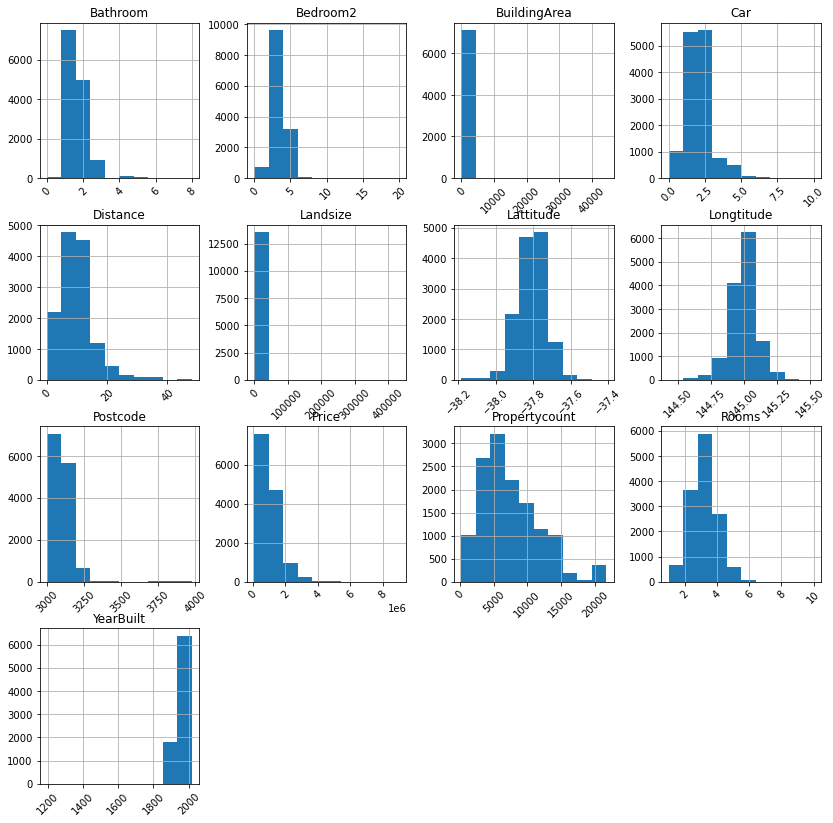

In [9]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

### Summary statistics of the numerical features

Now that we have an intuitive feel of the numeric features, we will look at actual statistics using df.describe()which displays their summary statistics.

In [11]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Categorical features

### Summary statistics of the categorical features

For categorical features, it is important to show the summary statistics before we plot graphs because some features have a lot of unique classes (like we will see for the Address) and the classes would be unreadable if visualized on a countplot.

To check the summary statistics of only the categorical features, we will use df.describe(include=’object’)

In [12]:
data.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,53 William St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


### Plot each categorical feature

Using the statistics above, we note that Type, Method and Regionname have less than 10 classes and can be effectively visualized. We will plot these features using the Seaborn countplot, which is like a histogram for categorical variables. Each bar in a countplot represents a unique class.

I created a For loop. For each categorical feature, a countplot will be displayed to show how the classes are distributed for that feature. The line df.select_dtypes(include=’object’) selects the categorical columns with their values and displays them. We will also include an If-statement so as to pick only the three columns with 10 or fewer classes using the line Series.nunique() < 10. Read the .nunique() documentation here.

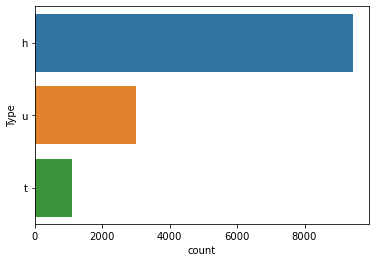

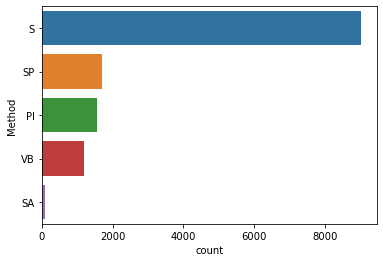

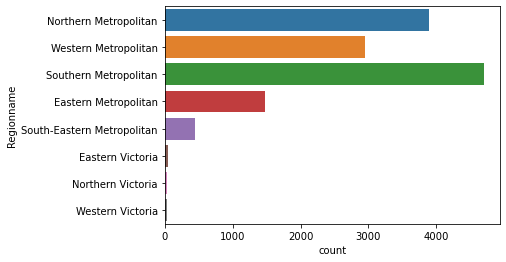

In [13]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column, data=data)
        plt.show()

## Grouping and segmentation

 
Segmentation allows us to cut the data and observe the relationship between categorical and numeric features.

### Segment the target variable by categorical features.

Here, we will compare the target feature, Price, between the various classes of our main categorical features (Type, Method and Regionname) and see how the Price changes with the classes.

We use the Seaborn boxplot which plots the distribution of Price across the classes of categorical features. This tutorial, from where I borrowed the Image below, explains the boxplot’s features clearly. The dots at both ends represent outliers.

![Image](img/boxplot.png)

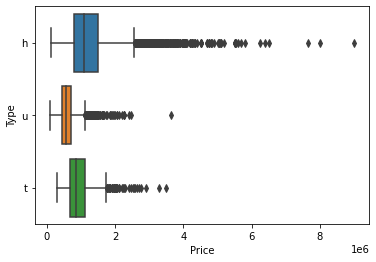

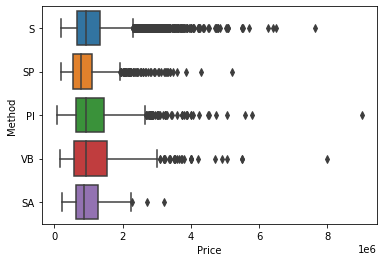

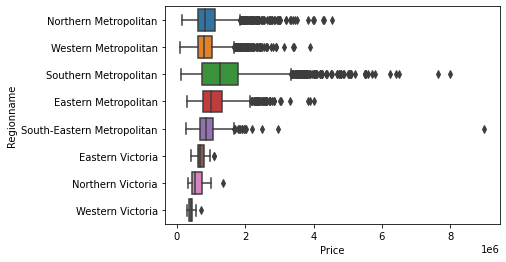

In [18]:
for column in data.select_dtypes(include='object'):
 if data[column].nunique() < 10:
     sns.boxplot(y=column, x='Price', data=data)
     plt.show()

## Group numeric features by each categorical feature.

Here we will see how all the other numeric features, not just Price, change with each categorical feature by summarizing the numeric features across the classes. We use the Dataframe’s groupby function to group the data by a category and calculate a metric (such as mean, median, min, std, etc) across the various numeric features.

For only the 3 categorical features with less than 10 classes, we group the data, then calculate the mean across the numeric features. We use display() which results to a cleaner table than print().

In [19]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        display(data.groupby(column).mean())

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Type,,,,,,,,,,,,,
h,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.771222,617.181924,176.866248,1954.081176,-37.803795,144.994700,7259.025505
t,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,140.046323,1998.988189,-37.815782,144.996489,7094.459605
u,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128358,477.314219,80.737121,1980.016708,-37.823710,144.996363,8199.280080


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Method,,,,,,,,,,,,,
PI,3.077366,1.133242e+06,9.482097,3106.742327,3.062660,1.714194,1.703918,521.682864,158.783107,1965.621106,-37.814429,145.001865,7749.644501
S,2.941809,1.087327e+06,10.431523,3106.171359,2.914875,1.498781,1.602581,531.129905,155.781647,1963.382091,-37.808204,144.997012,7496.049435
SA,3.010870,1.025772e+06,12.385870,3132.304348,3.010870,1.554348,1.769231,699.532609,151.454318,1979.340000,-37.818112,145.023262,6945.902174
SP,2.795655,8.998924e+05,10.374692,3096.480916,2.785672,1.456254,1.560472,469.346447,128.631366,1968.742958,-37.804809,144.972983,7093.759248
VB,2.924103,1.166510e+06,8.273728,3107.337781,2.896580,1.675563,1.602359,927.331943,152.419093,1965.464807,-37.815460,145.002459,7307.331943


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,
Eastern Metropolitan,3.322230,1.104080e+06,13.901088,3111.162475,3.313392,1.698844,1.792916,634.133923,178.001521,1971.859903,-37.788820,145.129184,5713.788579
Eastern Victoria,3.396226,6.999808e+05,34.209434,3567.584906,3.396226,1.811321,2.056604,2949.698113,183.645000,1984.032258,-37.959292,145.324428,8872.358491
Northern Metropolitan,2.755527,8.981711e+05,8.078329,3071.360925,2.734190,1.367866,1.454123,568.948072,124.177723,1962.764286,-37.747258,144.981176,9485.602057
Northern Victoria,3.560976,5.948293e+05,33.748780,3418.707317,3.560976,1.853659,1.925000,3355.463415,1746.374286,1986.666667,-37.599620,144.838486,4260.975610
South-Eastern Metropolitan,3.360000,9.229438e+05,23.813556,3225.255556,3.355556,1.657778,2.044444,613.991111,162.734296,1976.859504,-37.993727,145.145865,6589.366667
Southern Metropolitan,2.860916,1.372963e+06,8.756656,3156.714590,2.835144,1.624068,1.576264,509.252183,153.580962,1960.523777,-37.866981,145.034312,7622.279233
Western Metropolitan,3.023406,8.664205e+05,10.104579,3031.781208,2.990502,1.501018,1.696392,493.606852,144.697623,1968.155192,-37.782382,144.862512,5561.785957
Western Victoria,3.406250,3.975234e+05,30.753125,3337.687500,3.406250,1.468750,1.843750,655.500000,134.683810,1982.565217,-37.695163,144.569906,4191.156250


## Relationships between numeric features and other numeric features

### Correlations matrix for the different numerical features

A correlation is a value between -1 and 1 that amounts to how closely values of two separate features move simultaneously. A positive correlation means that as one feature increases the other one also increases, while a negative correlation means one feature increases as the other decreases. Correlations close to 0 indicate a weak relationship while closer to -1 or 1 signifies a strong relationship.

In [20]:
corrs = data.corr()
corrs

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


### Heatmap of the correlations

We will use a Seaborn heatmap to plot the grid as a rectangular color-coded matrix. We use sns.heatmap(corrs, cmap=’RdBu_r’,annot=True).

The cmap=‘RdBu_r’ argument tells the heatmap what colour palette to use. A high positive correlation appears as dark red and a high negative correlation as dark blue. Closer to white signifies a weak relationship. Read this nice tutorial for other color palettes. annot=True includes the values of the correlations in the boxes for easier reading and interpretation.

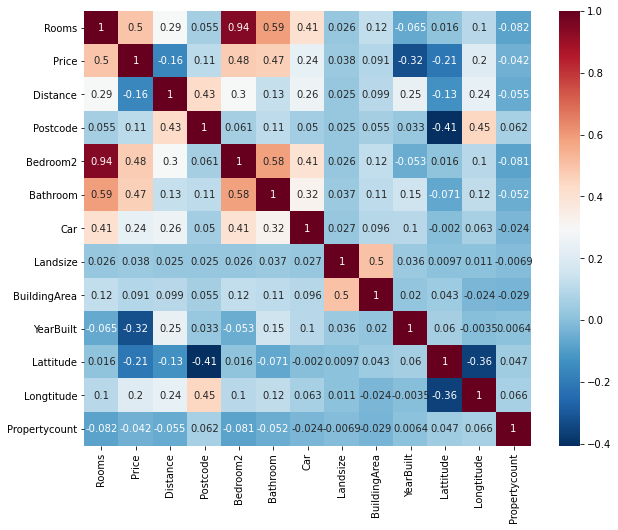

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

# Miscellous

In [ ]:
# imputation on the nearest values
# GOOD
# TO DO for df.columns
# TO DO for regions
# add if condition for the first and last element
df_brandy = df['brandy']
ind = np.where(np.isnan(df_brandy))[0]
rows_with_nan_brandy = [ round((df_brandy.iloc[index+1]+ df_brandy.iloc[index-1])/2,2)
                 for index in ind]

new_column = pd.Series(rows_with_nan_brandy, name='brandy', index = ind)
df.update(new_column)